In [2]:
import sys ,os 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(font_scale=1.5,style='whitegrid',context="paper")
from math import pi


In [82]:
## source code ##
## https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
def plot_radar(dataframe,title,list_of_colors,linestyle_list):
    '''Funtion to plot radar , using a dataframe , title , list of colors you need, and linestyle,
    be careful with the order of the datframe , and also the scale of the line
    '''
    # ------- PART 1: Create background
    categories = dataframe.T.index.to_list()
      # number of variable
      # categories=list(df)[1:]
      #categories = metrics_only.T["group"].values.tolist() ### original line 

    N = len(categories)

      # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

      # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

      # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

      # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

      # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks([0,0.2,0.4,0.6,0.8,1.0], ["0","0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
    plt.ylim(0,1)
#     plt.yticks([0.2,0.4,0.6,0.8,1.0], ["0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
#     plt.ylim(0.2,1)
#     plt.yticks([0.4,0.6,0.8,1.0], ["0.4","0.6","0.8","1.0"], color="grey", size=10)
#     plt.ylim(0.3,1)
#     plt.yticks([0.7,0.8,0.9,1.0], ["0.7","0.8","0.9","1.0"], color="grey", size=10)
#     plt.ylim(0.7,1)

      #------ PART 2: Add plots

      # Plot each individual = each line of the data
      # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

      #for i,row in zip(['r','g','b'],["SVM","Perceptron","RandomForest"]):
    for i,row, style in zip(list_of_colors,dataframe.index.to_list(),linestyle_list):
        print (i,row)
        values = dataframe.loc[row].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, i,linewidth=2, linestyle=style, label=row)
          # ax.fill(angles, values,i , alpha=0.1)



      # Add legend
    plt.legend( bbox_to_anchor=(0, 1))

#     plt.legend()
#     plt.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
#     plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.tight_layout()
    #   plt.show()
    #   plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
    plt.savefig(f"figures/{title}.svg",dpi=300,transparent=True,format="svg")

    #   plt.savefig(f"../figures/{title}.svg",format="svg")

In [3]:
df_metrics_unbalanced =pd.read_csv('../data/dataframe_metrics_shakel_unbalanced.csv')
df_metrics_unbalanced.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']

df_metrics_balanced =pd.read_csv('../data/dataframe_metrics_shakel_balanced.csv')
df_metrics_balanced.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']


In [84]:
df_CV_10k = pd.read_csv("../data/dataframe_metrics_shakel_metrics_crossvalidation.csv")
# df_CV_10k = df_CV_10k[['BM5 bal  ',' 10kCV Bal ',' BM5 unb ','10kCV Unb ']]
# df_CV_10k.columns = ['Bal  BM4/5-up','Bal 10CV','3K BM4/5-up','3K-10CV']
# df_CV_10k["Metrics"] = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']
# df_CV_10k = df_CV_10k.set_index("Metrics")

In [80]:
df_CV_10k

,Acc,R_inc,R_cor,P_inc,P_corr,F1_inc,F1_cor,MCC
Bal BM4/5-up,0.8321,0.8669,0.7973,0.8105,0.8569,0.8377,0.8260,0.6658
Bal-10CV,0.9541,0.9592,0.8878,0.9911,0.6239,0.9749,0.7324,0.7216
3K-BM4/5-up,0.9164,0.9232,0.7985,0.9874,0.3777,0.9543,0.5128,0.5133
3K-10CV,0.9568,0.9605,0.9090,0.9928,0.6384,0.9764,0.7498,0.7407


In [78]:
df_CV_10k.T

Metrics,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
Bal BM4/5-up,0.8320,0.8668,0.7972,0.8104,0.8569,0.8377,0.8260,0.6658
Bal 10CV,0.9446,0.9645,0.9248,0.9288,0.9627,0.9461,0.9430,0.8904
3K BM4/5-up,0.9677,0.9683,0.9554,0.9973,0.6380,0.9826,0.7651,0.7661
3K-10CV,0.9619,0.9633,0.9387,0.9963,0.6006,0.9795,0.7319,0.7335


b RF 
gold PRC 
g SVM 


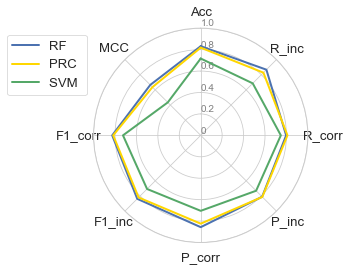

In [7]:
plot_radar(df_metrics_balanced,"Radar_plot_metrics_balanced",['b','gold','g'],['solid','solid','solid'])

Navy RF 
goldenrod PRC 
darkgreen SVM 


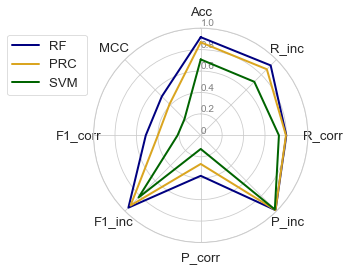

In [8]:
plot_radar(df_metrics_unbalanced,"Radar_plot_metrics_unbalanced",['Navy','goldenrod','darkgreen'],['solid','solid','solid'])

b Bal BM4/5-up
indianred Bal-10CV
Navy 3K-BM4/5-up
darkorange 3K-10CV


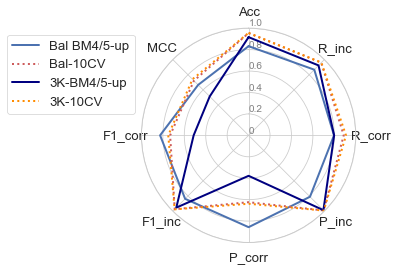

In [85]:
plot_radar(df_CV_10k,"CV_performance",['b','indianred','Navy','darkorange'],['solid','dotted','solid','dotted'])

In [10]:
df_hard = pd.read_csv("../data/dataframe_metrics_hard_performance.csv")
df_hard.set_index("Metrics",inplace=True)

In [11]:
df_hard = df_hard.T

In [12]:
df_hard.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']

In [13]:
df_fig_10 = pd.read_csv("../data/dataframe_metrics_CODES_performance_final.csv")

In [14]:
df_fig_10

,Accuracy,Recall_inc,Recall_cor,Precision_inc,Precision_cor,F1_inc,F1_cor,MCC
RF_3K-BM4/5-up,0.916363,0.923238,0.798518,0.987428,0.377685,0.954255,0.512817,0.513344
CoDES_3K-BM4/5-up,0.918259,0.919743,0.898895,0.991649,0.461788,0.954343,0.610134,0.609263
CoDES_Score_set,0.707317,0.671200,0.985185,0.997139,0.280295,0.802331,0.436423,0.426736
Zdock,0.213542,0.178596,0.998177,0.999546,0.051343,0.303045,0.097663,0.094846


In [15]:
df_fig_10.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']

Navy RF_3K-BM4/5-up
gold CoDES_3K-BM4/5-up
black CoDES_Score_set


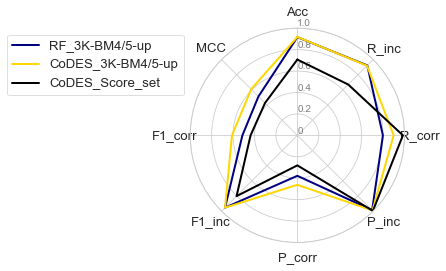

In [16]:
plot_radar(df_fig_10,"figure_10",['Navy','gold','black'],['solid','solid','solid'])

darkgrey bal-hard-10CV_bal-hard
magenta bal-hard-10CV_3K-hard


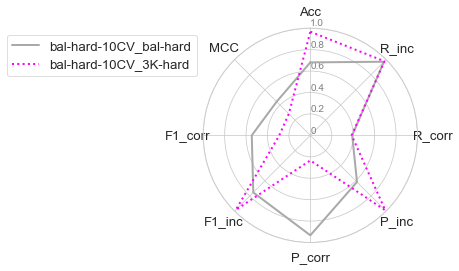

In [17]:
plot_radar(df_hard,"hard_set",['darkgrey','magenta'],['solid','dotted'])

In [18]:
df_hard

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
bal-hard-10CV_bal-hard,0.681067,0.971610,0.390523,0.615782,0.932768,0.753392,0.546630,0.444624
bal-hard-10CV_3K-hard,0.967795,0.977836,0.385701,0.989274,0.233920,0.983517,0.289714,0.284112


In [19]:
df_hard.T.columns

Index(['bal-hard-10CV_bal-hard', 'bal-hard-10CV_3K-hard'], dtype='object')

In [20]:
df_ss = pd.read_csv("../data/dataframe_metrics_Score_set_by_target.csv")


In [21]:
# df_ss.columns  = ['Target','Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']
df_ss.columns

Index(['Target', 'Acc', 'R_inc', 'R_corr', 'P_inc', 'P_corr', 'F1_inc',
       'F1_corr', 'MCC'],
      dtype='object')

In [22]:
df_ss.set_index("Target",inplace=True)

<AxesSubplot:xlabel='Target'>

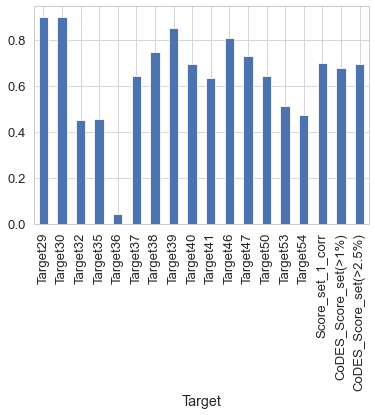

In [23]:
df_ss["Acc"].T.plot(kind="bar")

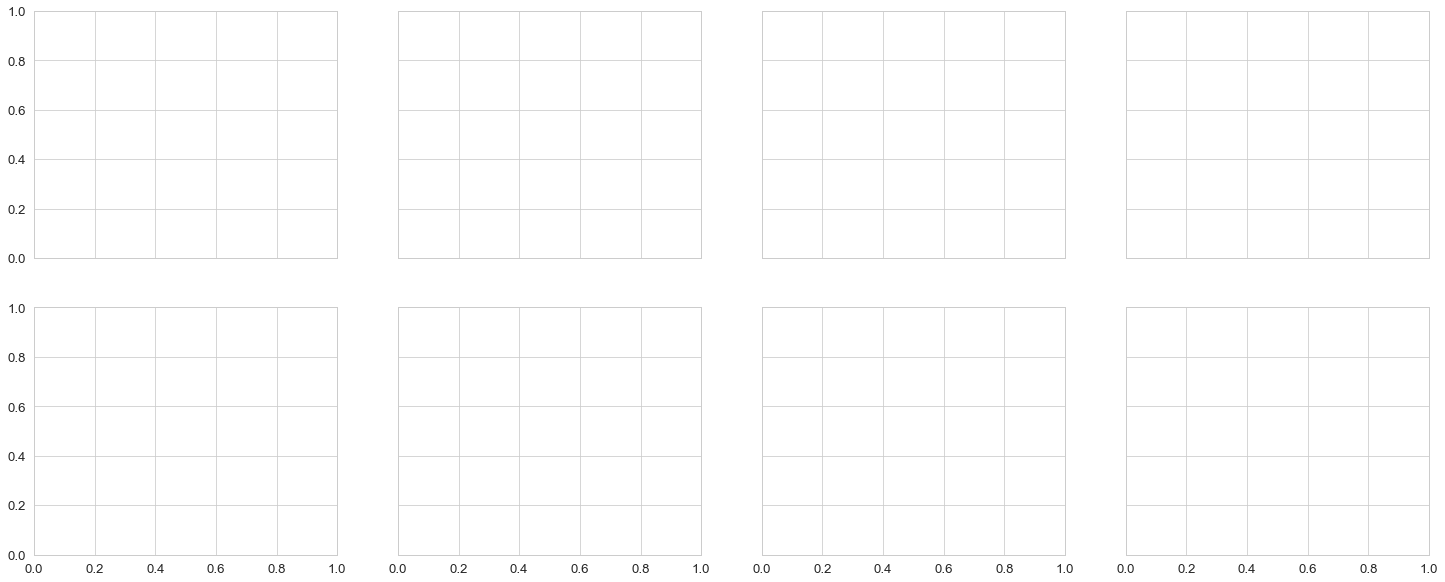

In [24]:
fig , axs = plt.subplots(nrows=2 , ncols=4 ,sharex=True,sharey=True, figsize=(25,10))

In [25]:
for z in ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']:
    print (z)
for m in range(2):
    for n in range(4):
        print (m,n)




my_dict = {'Acc' : (0 , 0),
'R_inc' : (0 ,1 ),
'R_corr' :( 0 ,2),
'P_inc' : (0 ,3 ),
'P_corr' : (1 ,0 ),
'F1_inc' :(1 ,1 ),
'F1_corr' :( 1, 2),
'MCC' : (1  ,3)}

Acc
R_inc
R_corr
P_inc
P_corr
F1_inc
F1_corr
MCC
0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


In [26]:
for z,c in zip(['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC'], 
               ['r','b', 'g', 'pink','gold' ,'silver' , 'Navy','black']):
    print ( my_dict[z][0], my_dict[z][1])
    df_ss[z].T.plot(kind="bar",ax=axs[my_dict[z][0]][my_dict[z][1]], title=z , color=c)


#             df_ss[z].T.plot(kind="bar")
            

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


In [27]:
fig.savefig(f"figures/CoDes_Score_set_by_target.png",dpi=300,transparent=True,format="png")
# plt.tight_layout()
# plt.show()
    #   plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
# plt.savefig(f"figures/CoDes_Score_set_by_target.png",dpi=300,transparent=True,format="png")

In [28]:
# plot_radar(df_fig_10,"figure_10",['Navy','gold','black'],['solid','solid','solid'])

In [29]:
df_CODES_in_scoreset = pd.concat([df_fig_10.loc["CoDES_Score_set"],df_ss.loc["Score_set_1_corr"]],axis=1 )

Cyan CoDES_Score_set
DarkCyan Score_set_1_corr


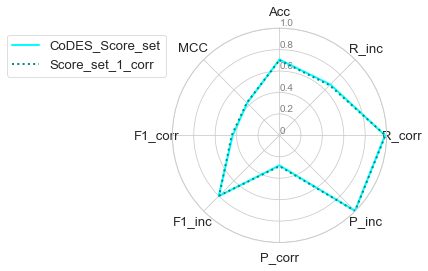

In [30]:
plot_radar(df_CODES_in_scoreset.T,"CoDES_in_Score_set",['Cyan','DarkCyan'],['solid','dotted'])

In [31]:
df_CODES_in_scoreset.round(4)

,CoDES_Score_set,Score_set_1_corr
Acc,0.7073,0.7012
R_inc,0.6712,0.6613
R_corr,0.9852,0.9889
P_inc,0.9971,0.9977
P_corr,0.2803,0.2880
F1_inc,0.8023,0.7954
F1_corr,0.4364,0.4461
MCC,0.4267,0.4310


In [32]:
df_ss.loc[['CoDES_Score_set(>1%)','CoDES_Score_set(>2.5%)' ]]

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
Target,,,,,,,,
CoDES_Score_set(>1%),0.6763,0.6213,0.9930,0.9981,0.3132,0.7658,0.4762,0.4372
CoDES_Score_set(>2.5%),0.6937,0.6216,0.9948,0.9980,0.3864,0.7661,0.5566,0.4867


In [33]:
df_CODES_in_scoreset = df_ss.loc[['CoDES_Score_set(>1%)','CoDES_Score_set(>2.5%)' ]]
# df_CODES_in_scoreset = df_ss.loc[['above_1','above_2']]
df_CODES_in_scoreset = df_CODES_in_scoreset.append(df_fig_10.loc["CoDES_Score_set"] )

In [34]:
df_CODES_in_scoreset.T.round(4)

Target,CoDES_Score_set(>1%),CoDES_Score_set(>2.5%),CoDES_Score_set
Acc,0.6763,0.6937,0.7073
R_inc,0.6213,0.6216,0.6712
R_corr,0.9930,0.9948,0.9852
P_inc,0.9981,0.9980,0.9971
P_corr,0.3132,0.3864,0.2803
F1_inc,0.7658,0.7661,0.8023
F1_corr,0.4762,0.5566,0.4364
MCC,0.4372,0.4867,0.4267


seagreen CoDES_Score_set(>1%)
royalblue CoDES_Score_set(>2.5%)
Black CoDES_Score_set


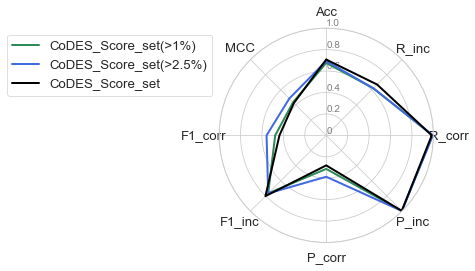

In [35]:
plot_radar(df_CODES_in_scoreset,"CoDES_in_Score_set_1_2",['seagreen','royalblue','Black'],['solid','solid','solid'])

In [36]:
df_fig_10 = df_fig_10.loc[['RF_3K-BM4/5-up','CoDES_3K-BM4/5-up','CoDES_Score_set']]
df_fig_10 = df_fig_10.append(df_ss.loc['CoDES_Score_set(>2.5%)' ])


Navy RF_3K-BM4/5-up
gold CoDES_3K-BM4/5-up
black CoDES_Score_set
green CoDES_Score_set(>2.5%)


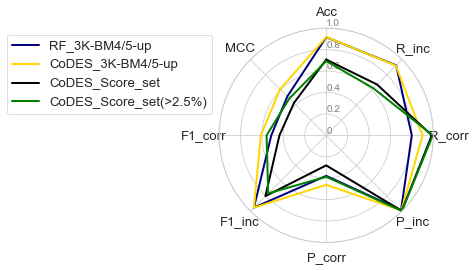

In [37]:
plot_radar(df_fig_10,"figure_10",['Navy','gold','black','green'],['solid','solid','solid','solid'])

In [38]:
df_fig_10

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
RF_3K-BM4/5-up,0.916363,0.923238,0.798518,0.987428,0.377685,0.954255,0.512817,0.513344
CoDES_3K-BM4/5-up,0.918259,0.919743,0.898895,0.991649,0.461788,0.954343,0.610134,0.609263
CoDES_Score_set,0.707317,0.671200,0.985185,0.997139,0.280295,0.802331,0.436423,0.426736
CoDES_Score_set(>2.5%),0.693700,0.621600,0.994800,0.998000,0.386400,0.766100,0.556600,0.486700


Navy RF_3K-BM4/5-up
gold CoDES_3K-BM4/5-up


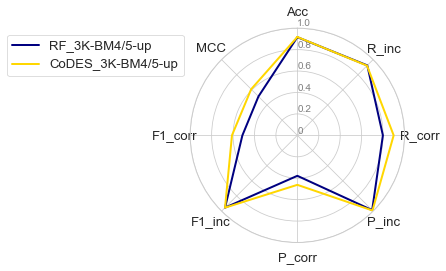

In [39]:
plot_radar(df_fig_10.loc[['RF_3K-BM4/5-up','CoDES_3K-BM4/5-up']],"figure_10_a",['Navy','gold'],['solid','solid'])

gold CoDES_3K-BM4/5-up
black CoDES_Score_set
green CoDES_Score_set(>2.5%)


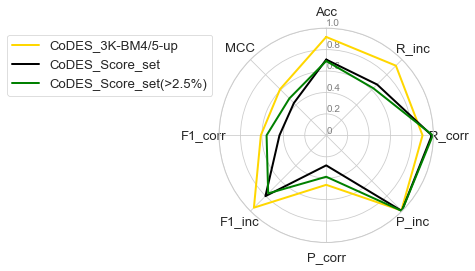

In [40]:
plot_radar(df_fig_10.loc[['CoDES_3K-BM4/5-up','CoDES_Score_set','CoDES_Score_set(>2.5%)']],
           "figure_10_b",
           ['gold','black','green'],
           ['solid','solid','solid'])

In [70]:
df_fig_10

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
RF_3K-BM4/5-up,0.916363,0.923238,0.798518,0.987428,0.377685,0.954255,0.512817,0.513344
CoDES_3K-BM4/5-up,0.918259,0.919743,0.898895,0.991649,0.461788,0.954343,0.610134,0.609263
CoDES_Score_set,0.707317,0.671200,0.985185,0.997139,0.280295,0.802331,0.436423,0.426736
CoDES_Score_set(>2.5%),0.693700,0.621600,0.994800,0.998000,0.386400,0.766100,0.556600,0.486700


In [73]:
df_CV_10k.T

Metrics,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
Bal BM4/5-up,0.8320,0.8668,0.7972,0.8104,0.8569,0.8377,0.8260,0.6658
Bal 10CV,0.9446,0.9645,0.9248,0.9288,0.9627,0.9461,0.9430,0.8904
3K BM4/5-up,0.9677,0.9683,0.9554,0.9973,0.6380,0.9826,0.7651,0.7661
3K-10CV,0.9619,0.9633,0.9387,0.9963,0.6006,0.9795,0.7319,0.7335


In [74]:
df_metrics_balanced

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
RF,0.832070,0.866860,0.797279,0.810467,0.856903,0.837716,0.826017,0.665753
PRC,0.818410,0.827386,0.809434,0.812794,0.824231,0.820025,0.816765,0.636922
SVM,0.716994,0.686329,0.747658,0.731171,0.704455,0.708041,0.725414,0.434806


In [75]:
df_metrics_unbalanced

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
RF,0.916363,0.923238,0.798518,0.987428,0.377685,0.954255,0.512817,0.513344
PRC,0.868326,0.872566,0.795650,0.986521,0.267004,0.926051,0.399832,0.411593
SVM,0.708476,0.707225,0.729924,0.978206,0.126983,0.820932,0.216331,0.214437


In [87]:
pd.concat([df_metrics_balanced,df_metrics_unbalanced,df_CV_10k,df_fig_10]).to_csv("../data/all_metrics_together_CoDES.csv")

In [41]:
df_haikal_test_set_bal = pd.read_csv("../data/balanced_test_set_haikal.csv")
df_haikal_test_set_unb = pd.read_csv("../data/unbalanced_test_set_haikal.csv")
df_haikal_validation_set_bal = pd.read_csv("../data/balanced_validation_set_haikal.csv")
df_haikal_validation_set_unb = pd.read_csv("../data/unbalanced_validation_set_haikal.csv")

In [42]:
df_haikal_test_set_bal.set_index("Metrics",inplace=True)
df_haikal_test_set_unb.set_index("Metrics",inplace=True)
df_haikal_validation_set_bal.set_index("Metrics",inplace=True)
df_haikal_validation_set_unb.set_index("Metrics",inplace=True)

In [43]:
pp = ['Perceptron_Ori', 'Perceptron_hAIkal' ]
tf2 = ['TF2_Ori','TF2_hAIkal' ]
rfc = ['RFC_Ori', 'RFC_hAIkal']

black Perceptron_Ori
gold Perceptron_hAIkal


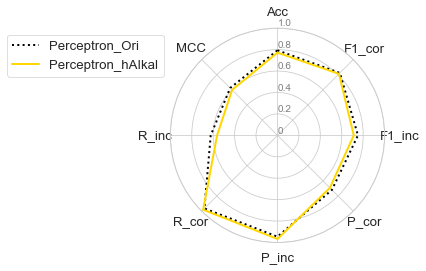

In [44]:
plot_radar(df_haikal_test_set_bal[pp].T,
           "figure_haikal_test_bal_Perceptron",
           ['black','gold'],
           ['dotted','solid'])

black TF2_Ori
gold TF2_hAIkal


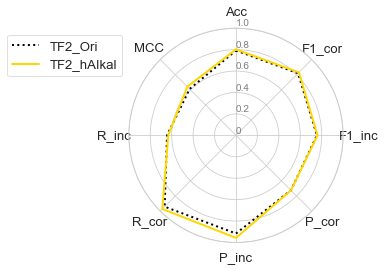

In [45]:
plot_radar(df_haikal_test_set_bal[tf2].T,
           "figure_haikal_test_bal_TF2",
           ['black','gold'],
           ['dotted','solid'])

black RFC_Ori
gold RFC_hAIkal


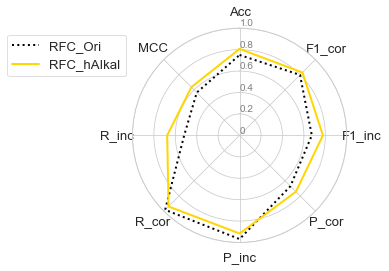

In [46]:
plot_radar(df_haikal_test_set_bal[rfc].T,
           "figure_haikal_test_bal_RFC",
           ['black','gold'],
           ['dotted','solid'])

black RFC_Ori
green RFC_hAIkal


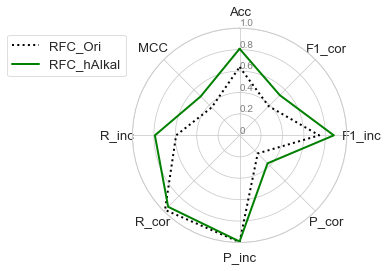

In [47]:
plot_radar(df_haikal_test_set_unb[rfc].T,
           "figure_haikal_test_unb_RFC",
           ['black','green'],
           ['dotted','solid'])

black TF2_Ori
green TF2_hAIkal


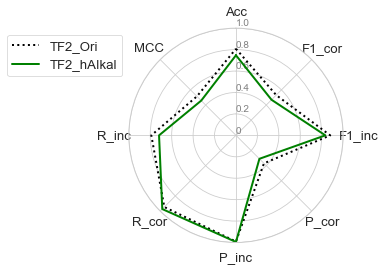

In [48]:
plot_radar(df_haikal_test_set_unb[tf2].T,
           "figure_haikal_test_unb_TF2",
           ['black','green'],
           ['dotted','solid'])

black Perceptron_Ori
green Perceptron_hAIkal


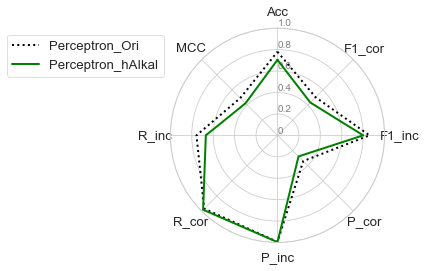

In [49]:
plot_radar(df_haikal_test_set_unb[pp].T,
           "figure_haikal_test_unb_Perceptron",
           ['black','green'],
           ['dotted','solid'])

black Perceptron_Ori
green Perceptron_hAIkal


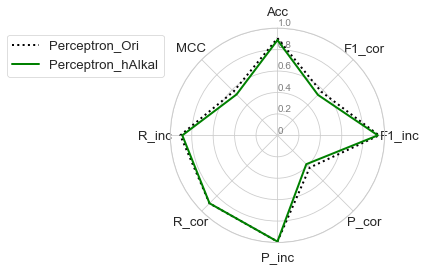

In [50]:
plot_radar(df_haikal_validation_set_unb[pp].T,
           "figure_haikal_validation_unb_Perceptron",
           ['black','green'],
           ['dotted','solid'])

black RFC_Ori
green RFC_hAIkal


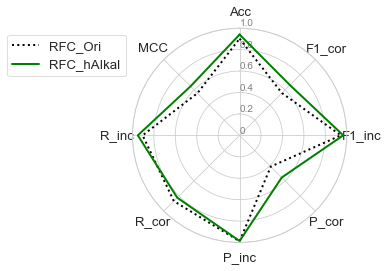

In [51]:
plot_radar(df_haikal_validation_set_unb[rfc].T,
           "figure_haikal_validation_unb_RFC",
           ['black','green'],
           ['dotted','solid'])

black TF2_Ori
green TF2_hAIkal


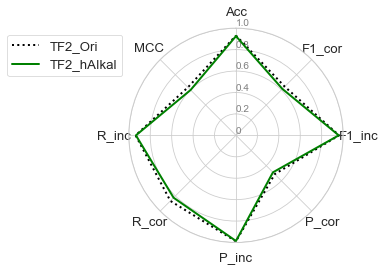

In [52]:
plot_radar(df_haikal_validation_set_unb[tf2].T,
           "figure_haikal_validation_unb_TF2",
           ['black','green'],
           ['dotted','solid'])

black TF2_Ori
gold TF2_hAIkal


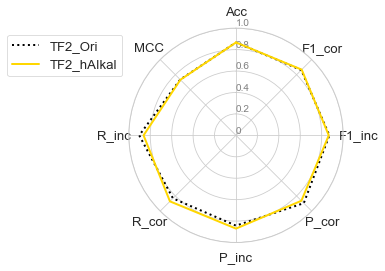

In [53]:
plot_radar(df_haikal_validation_set_bal[tf2].T,
           "figure_haikal_validation_bal_TF2",
           ['black','gold'],
           ['dotted','solid'])

black Perceptron_Ori
gold Perceptron_hAIkal


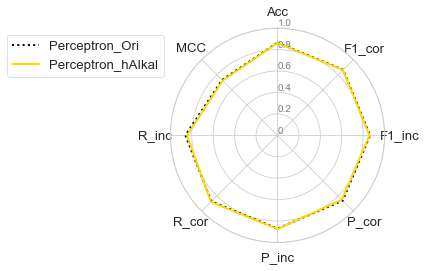

In [54]:
plot_radar(df_haikal_validation_set_bal[pp].T,
           "figure_haikal_validation_bal_Perceptron",
           ['black','gold'],
           ['dotted','solid'])

black RFC_Ori
gold RFC_hAIkal


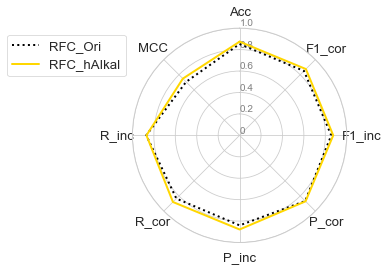

In [55]:
plot_radar(df_haikal_validation_set_bal[rfc].T,
           "figure_haikal_validation_bal_RFC",
           ['black','gold'],
           ['dotted','solid'])

In [56]:
df_haikal_validation_set_unb

,Perceptron_Ori,Perceptron_hAIkal,TF2_Ori,TF2_hAIkal,RFC_Ori,RFC_hAIkal
Metrics,,,,,,
Acc,0.9064,0.8887,0.9317,0.9260,0.9024,0.9407
F1_cor,0.5771,0.5343,0.6433,0.6128,0.5585,0.6639
F1_inc,0.9474,0.9368,0.9622,0.9591,0.9451,0.9675
P_cor,0.4253,0.3805,0.5118,0.4881,0.4118,0.5564
P_inc,0.9914,0.9912,0.9891,0.9857,0.9889,0.9859
R_cor,0.8974,0.8968,0.8655,0.8233,0.8677,0.8228
R_inc,0.9071,0.8881,0.9368,0.9338,0.9050,0.9498
MCC,0.5790,0.5401,0.6339,0.5989,0.5565,0.6473


In [57]:
df = pd.read_csv("../data/table_Score_set_all_tmp.csv")

In [58]:
df

,T,CoDES,GraphRank,IScore,CAPRI_best
0,T29,10/7**,4,4,9/5**
1,T32,1/1**,4/1**,4/1**,2
2,T35,0,0,0,1
3,T37,10/1***/6**,2/1**,4/2**,6/1***
4,T40,7/3***/3**,4/3**,4/1***,10/10***
5,T41,5/2**,8,10/2**,10/2***
6,T46,2,3,4,4
7,T47,9/3***/6**,8/5***/3**,10/6***/4**,10/10***
8,T50,4/2**,0,4/3**,7/6**
9,T53,2/1**,5/1**,5/1**,8/3**


In [59]:
def decompress(x):
    total = x.split("/")[0]
    all_others = x.split("/")[1:]
    num = 0 
    num_b = 0 
    for x in all_others:
#         print (x[1:])
        if x[1:] == "***"   : 
            num = x[0]
        elif x[1:] == "**"  :
            num_b = x[0]
        else:
            break
    return total, num ,num_b

def get_all(x):
    total = x.split("/")[0]
    return int(total)

def get_high(x):
    all_others = x.split("/")[1:]
    num = 0 
    for x in all_others:
#         print (x[1:])
        if x[1:] == "***"   : 
            num = x[0]
    return int(num) 

def get_med(x):
    all_others = x.split("/")[1:]
    num = 0 
    for x in all_others:
#         print (x[1:])
        if x[1:] == "**"   : 
            num = x[0]
    return int(num) 

In [60]:
df["CoDES"].apply(decompress)

0    (10, 0, 7)
1     (1, 0, 1)
2     (0, 0, 0)
3    (10, 1, 6)
4     (7, 3, 3)
5     (5, 0, 2)
6     (2, 0, 0)
7     (9, 3, 6)
8     (4, 0, 2)
9     (2, 0, 1)
Name: CoDES, dtype: object

In [61]:
df["CoDES"].apply(get_all)

0    10
1     1
2     0
3    10
4     7
5     5
6     2
7     9
8     4
9     2
Name: CoDES, dtype: int64

In [62]:
firts_data = pd.DataFrame()

In [63]:
#  firts_data["CoDES"] =  df["CoDES"].apply(get_all)
for m in ['CoDES','GraphRank','IScore','CAPRI_best']: 
#     print (m)
    firts_data[m] =  df[m].apply(get_all)

In [64]:
firts_data["T"] = df["T"]

In [65]:
firts_data.set_index("T", inplace=True)

In [66]:
def plot_radar(dataframe,title,list_of_colors,linestyle_list):
    '''Funtion to plot radar , using a dataframe , title , list of colors you need, and linestyle,
    be careful with the order of the datframe , and also the scale of the line
    '''
    # ------- PART 1: Create background
    categories = dataframe.T.index.to_list()
      # number of variable
      # categories=list(df)[1:]
      #categories = metrics_only.T["group"].values.tolist() ### original line 

    N = len(categories)

      # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

      # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

      # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

      # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

      # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks(range(0,12,2), ["0","2","4","6","8","10"], color="grey", size=10)
    plt.ylim(0,10)
      # plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0], ["0.4","0.5","0.6","0.7","0.8","0.9","1.0"], color="grey", size=10)
      # plt.ylim(0.4,1)


      #------ PART 2: Add plots

      # Plot each individual = each line of the data
      # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

      #for i,row in zip(['r','g','b'],["SVM","Perceptron","RandomForest"]):
    for i,row, style in zip(list_of_colors,dataframe.index.to_list(),linestyle_list):
        print (i,row)
        values = dataframe.loc[row].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, i,linewidth=2, linestyle=style, label=row)
          # ax.fill(angles, values,i , alpha=0.1)



      # Add legend
#     plt.legend()
#     plt.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
    plt.legend( bbox_to_anchor=(0, 1))

    plt.tight_layout()
    #   plt.show()
    #   plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
    plt.savefig(f"figures/{title}.svg",dpi=300,transparent=True,format="svg")


Gold CoDES
Salmon GraphRank
coral IScore


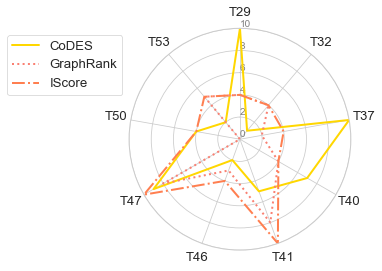

In [67]:
# plot_radar(firts_data.T, )
plot_radar(firts_data.drop("T35").T,
           "figure_Score_a",
           ['Gold','Salmon','coral',],
           ['solid','dotted','dashdot'])

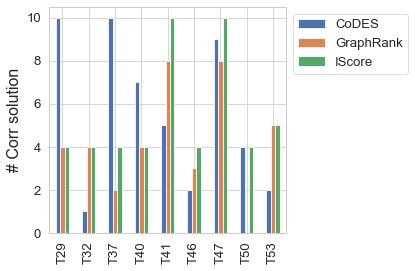

In [68]:
firts_data[['CoDES','GraphRank','IScore']].drop("T35").plot(kind="bar")
plt.legend( bbox_to_anchor=(1, 1))
plt.ylabel("# Corr solution",size=16)
plt.xlabel("")
plt.tight_layout()

plt.savefig("figures/barplot_scorer_comp.png",dpi=300,format='png',transparent=True)


In [3]:
df = pd.read_csv("../data/Map-DS.csv")

In [6]:
df.set_index("Position title",inplace=True)

In [8]:
def one_hot_encode(x):
    if x == "Low":
        return 1
    elif x == "Med":
        return 2
    else:
        return 3

In [10]:
df.columns

Index(['Math/Stats', 'SQL', 'Algos', 'Soft. Eng.', 'Big Data/Sys. Eng.',
       'Soft Skills/Dom. Know.'],
      dtype='object')

In [14]:
for m in df.columns:
    df[m] = df[m].apply(one_hot_encode)

In [15]:
df

,Math/Stats,SQL,Algos,Soft. Eng.,Big Data/Sys. Eng.,Soft Skills/Dom. Know.
Position title,,,,,,
Product DS,2,2,2,3,3,2
Data Eng.,1,2,1,3,3,1
DS,3,2,3,1,1,3
BI-DS,2,3,2,1,1,3
Data An.,1,3,1,1,1,3


In [43]:
def plot_radar(dataframe,title,list_of_colors,linestyle_list):
    '''Funtion to plot radar , using a dataframe , title , list of colors you need, and linestyle,
    be careful with the order of the datframe , and also the scale of the line
    '''
    # ------- PART 1: Create background
    categories = dataframe.T.index.to_list()
      # number of variable
      # categories=list(df)[1:]
      #categories = metrics_only.T["group"].values.tolist() ### original line 

    N = len(categories)

      # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

      # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

      # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

      # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

      # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks([1,2,3], ["Low","Med","High"], color="grey", size=10)
    plt.ylim(0,3)
      # plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0], ["0.4","0.5","0.6","0.7","0.8","0.9","1.0"], color="grey", size=10)
      # plt.ylim(0.4,1)


      #------ PART 2: Add plots

      # Plot each individual = each line of the data
      # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

      #for i,row in zip(['r','g','b'],["SVM","Perceptron","RandomForest"]):
    for i,row, style in zip(list_of_colors,dataframe.index.to_list(),linestyle_list):
        print (i,row)
        values = dataframe.loc[row].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, i,linewidth=1, linestyle=style, label=row)
        ax.fill(angles, values,i , alpha=0.1)



      # Add legend
#     plt.legend()
#     plt.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
    plt.legend( bbox_to_anchor=(0, 0.75))

    plt.tight_layout()
    #   plt.show()
    plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
#     plt.savefig(f"figures/{title}.svg",dpi=300,transparent=True,format="svg")


Salmon Product DS
Navy Data Eng.
Black DS
Green BI-DS
Red Data An.


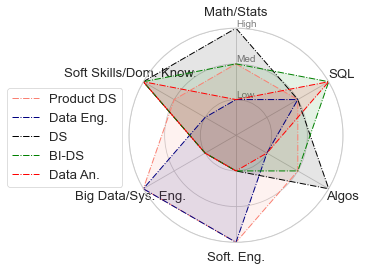

In [44]:
plot_radar(df,
           "RP_DS_table",
           ['Salmon','Navy','Black','Green','Red'],
           ['dashdot','dashdot','dashdot','dashdot','dashdot'])